In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# autoreload   
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from enum import Enum
class Images(Enum):
    MEMPHIS = 'memphis.jpeg'
    IPHONE = 'iphone.jpeg'
    PLATES = 'plates.png'
    DART = 'dart.webp'
    MIKEY = 'mikeyMouse.webp'
    MOSAIC = 'mosaic.webp'
    VOLLEY = 'olympicVolley.jpg'
    ROBOT = 'robot.png'
    GARDEN = 'garden.jpg'
    LILYPADS = 'lilyPads.webp'

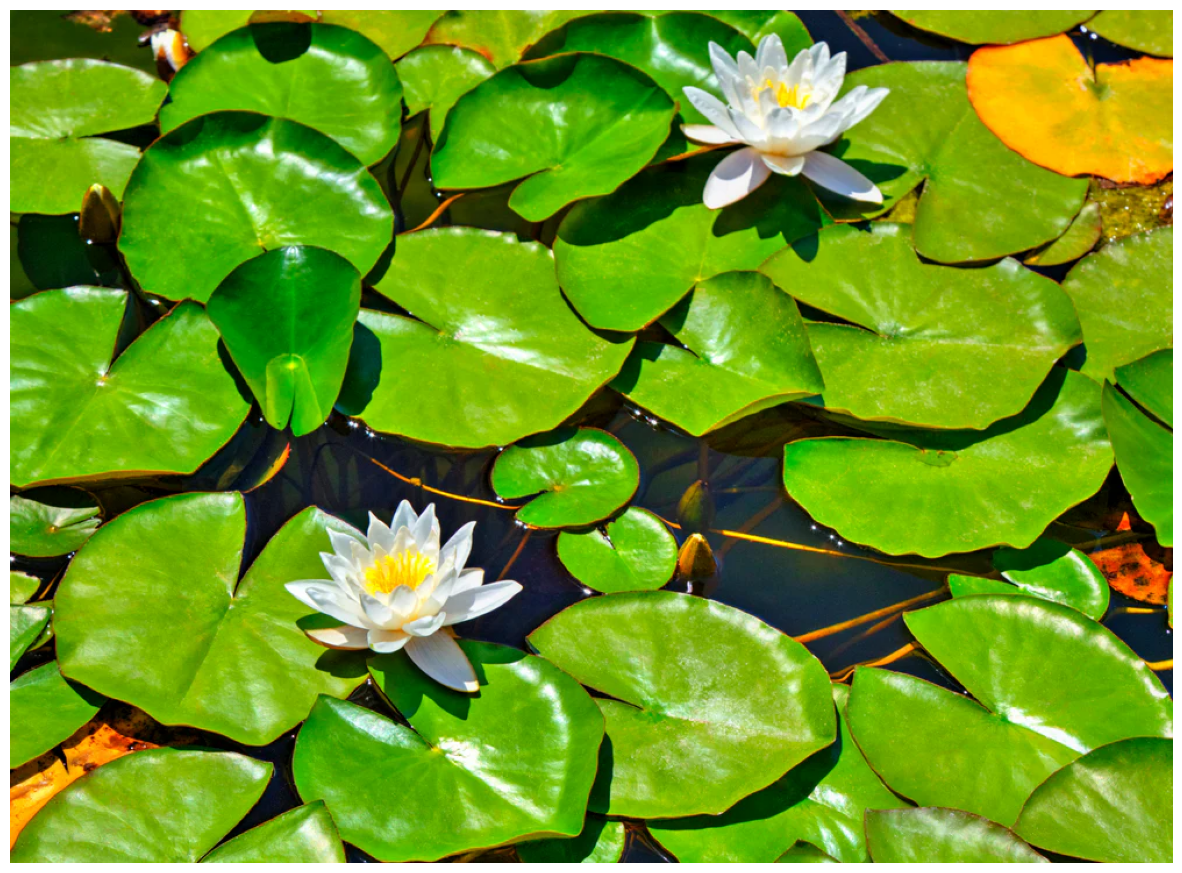

In [49]:
#Load the image
filename = Images.LILYPADS.value
img = cv2.imread('./GD_tests/srcImages/' + filename)
#Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plot the image
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Feature extraction
In this section three ellipses are extracted from the image

In [50]:
def plot_points(points, color='r', label=None):
    """
    Plot points on the image.
    """
    plt.scatter(points[:, 0], points[:, 1], c=color, marker='x', label=label, s=10, linewidths=.5)

### Point selection (manual)

Please select points for Circle 1 and press Enter when done.
Selected points for Circle 1: [(np.float64(456.2384102595369), np.float64(529.5588988476313)), (np.float64(565.884163567262), np.float64(500.4692091945614)), (np.float64(595.7197426986158), np.float64(503.4527671076968)), (np.float64(629.2847692213888), np.float64(515.3869987602383)), (np.float64(654.6450114830395), np.float64(528.0671198910636)), (np.float64(680.7511432229742), np.float64(546.7143568481597)), (np.float64(704.6196065280571), np.float64(573.5663780663781)), (np.float64(709.840832876044), np.float64(604.1478466760158)), (np.float64(709.840832876044), np.float64(622.049194154828)), (np.float64(597.2115216551836), np.float64(688.4333577220902)), (np.float64(566.630053045546), np.float64(694.4004735483609)), (np.float64(515.9095685222444), np.float64(689.9251366786579))]
Please select points for Circle 2 and press Enter when done.
Selected points for Circle 2: [(np.float64(331.67486738613496), np.float64(194.65452

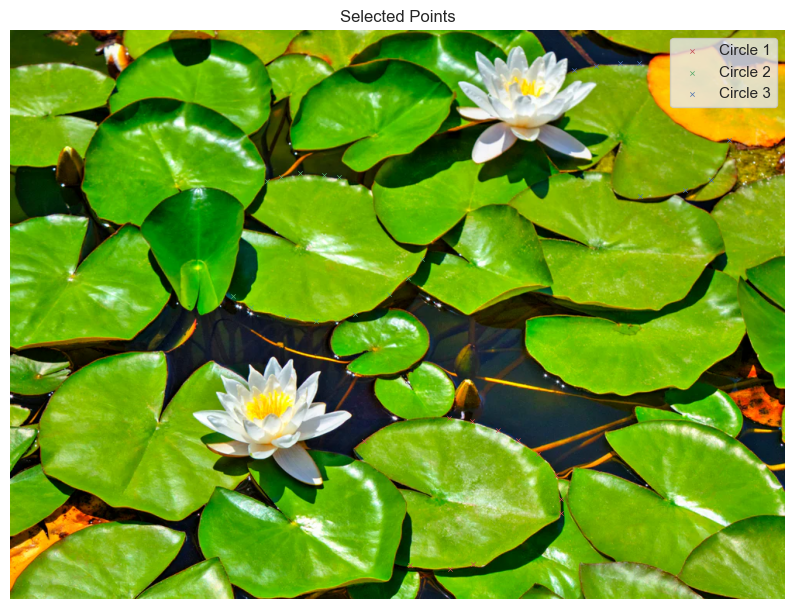

In [51]:
if True:
    %matplotlib tk
    # Display the image and allow the user to select points interactively
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Select points of the first circle')

    def select_points(obj_name:str, color='r'):
        """
        Function to select points on the image.
        :param obj_name: Name of the object to select points for.
        :return: List of selected points.
        """
        plt.title(f'Select points for {obj_name}')
        print(f"Please select points for {obj_name} and press Enter when done.")
        points = plt.ginput(n=-1, timeout=0)  # n=-1 allows unlimited points, timeout=0 waits indefinitely
        print(f"Selected points for {obj_name}:", points)

        plot_points(np.array(points), color=color, label=obj_name)
        plt.legend()
        return points

    # Use ginput to select points
    points_C1 = select_points("Circle 1", color='r')
    points_C2 = select_points("Circle 2", color='g')
    points_C3 = select_points("Circle 3", color='b')

    plt.close()

    %matplotlib inline
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Selected Points')
    plot_points(np.array(points_C1), color='r', label='Circle 1')
    plot_points(np.array(points_C2), color='g', label='Circle 2')
    plot_points(np.array(points_C3), color='b', label='Circle 3')
    plt.legend()
    plt.show()

    #Save the points to a file
    with open(f'./GD_tests/circlePoints/selected_points[{filename}].txt', 'w') as f:
        f.write("Circle 1:\n")
        for point in points_C1:
            f.write(f"{point[0]}, {point[1]}\n")
        f.write("\nCircle 2:\n")
        for point in points_C2:
            f.write(f"{point[0]}, {point[1]}\n")
        f.write("\nCircle 3:\n")
        for point in points_C3:
            f.write(f"{point[0]}, {point[1]}\n")

Loaded points for Circle 1: [[456.23841026 529.55889885]
 [565.88416357 500.46920919]
 [595.7197427  503.45276711]
 [629.28476922 515.38699876]
 [654.64501148 528.06711989]
 [680.75114322 546.71435685]
 [704.61960653 573.56637807]
 [709.84083288 604.14784668]
 [709.84083288 622.04919415]
 [597.21152166 688.43335772]
 [566.63005305 694.40047355]
 [515.90956852 689.92513668]]
Loaded points for Circle 2: [[331.67486739 194.6545231 ]
 [349.57621486 188.68740727]
 [373.44467817 183.46618092]
 [404.02614678 186.44973884]
 [423.41927322 189.43329675]
 [531.57324757 295.34960267]
 [512.92601061 319.21806597]
 [489.0575473  340.10297136]
 [445.05006809 366.2091031 ]
 [394.32958356 374.41388736]
 [356.28922017 367.70088206]
 [310.78996199 357.25842936]
 [287.66738817 343.08652928]]
Loaded points for Circle 3: [[812.77358088 214.04764953]
 [870.95296019 205.84286527]
 [903.77209723 192.41685466]
 [926.89467106 141.69637014]
 [810.53591244  42.49306953]
 [786.66744914  42.49306953]
 [755.34009105 

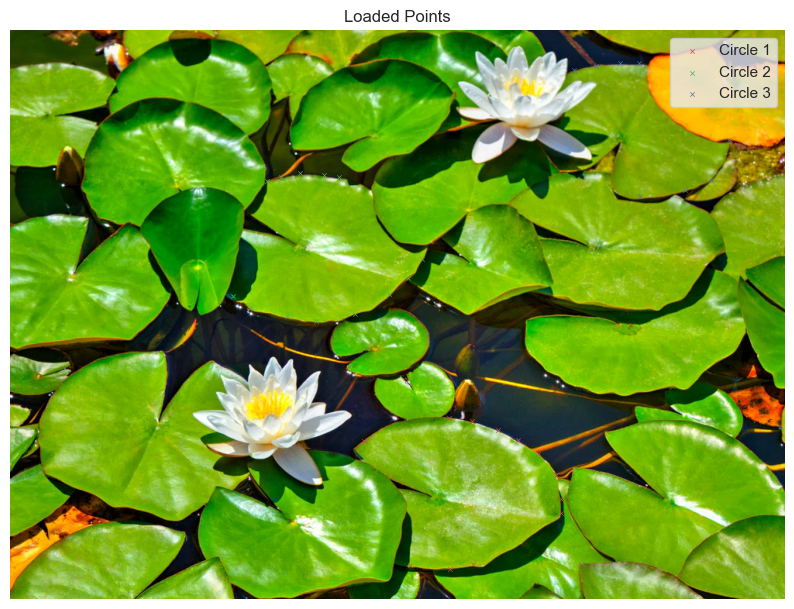

In [52]:
#Read points from the file
with open(f'./GD_tests/circlePoints/selected_points[{filename}].txt', 'r') as f:
    lines = f.readlines()
    points_C1 = []
    points_C2 = []
    points_C3 = []
    current_circle = None

    for line in lines:
        line = line.strip()
        if line.startswith("Circle 1:"):
            current_circle = points_C1
        elif line.startswith("Circle 2:"):
            current_circle = points_C2
        elif line.startswith("Circle 3:"):
            current_circle = points_C3
        elif line and current_circle is not None:
            x, y = map(float, line.split(','))
            current_circle.append((x, y))

    points_C1 = np.array(points_C1)
    points_C2 = np.array(points_C2)
    points_C3 = np.array(points_C3)

# Print the loaded points
print("Loaded points for Circle 1:", points_C1)
print("Loaded points for Circle 2:", points_C2)
print("Loaded points for Circle 3:", points_C3)

# centerX = img.shape[1] // 2
# centerY = img.shape[0] // 2
# center = np.array([centerX, centerY])

# scale = 1

# # Center the points around the center of the image
# points_C1 = points_C1 - center
# points_C1 = points_C1 * scale

# points_C2 = points_C2 - center
# points_C2 = points_C2 * scale

# points_C3 = points_C3 - center
# points_C3 = points_C3 * scale

%matplotlib inline
#Plot the loaded points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Loaded Points')
plot_points(points_C1, color='r', label='Circle 1')
plot_points(points_C2, color='g', label='Circle 2')
plot_points(points_C3, color='b', label='Circle 3')
plt.legend()
plt.show()

### Fit Ellipse to points

In [53]:
from HomoTopiContinuation.DataStructures.datastructures import Conic, Conics, Homography

In [54]:
def getConic(x0, y0, MA, ma, theta):
    a = MA / 2
    b = ma / 2
    theta_rad = np.deg2rad(theta)
    c, s = np.cos(theta_rad), np.sin(theta_rad)

    A = (c**2) / (a**2) + (s**2) / (b**2)
    B = 2 * c * s * (1/(a**2) - 1/(b**2))
    C = (s**2) / (a**2) + (c**2) / (b**2)
    D = -2*A*x0 - B*y0
    E = -2*C*y0 - B*x0
    F = A*x0**2 + B*x0*y0 + C*y0**2 - 1
    matrix = np.array([[A, B/2, D/2], [B/2, C, E/2], [D/2, E/2, F]])
    matrix /= matrix[0, 0]  # Normalize the matrix
    return Conic(matrix)

In [55]:
# Fit ellipses to the points using OpenCV
ellipse_C1 = cv2.fitEllipse(points_C1.astype(np.float32))
ellipse_C2 = cv2.fitEllipse(points_C2.astype(np.float32))
ellipse_C3 = cv2.fitEllipse(points_C3.astype(np.float32))

print("Ellipse parameters for Circle 1:", ellipse_C1)
print("Ellipse parameters for Circle 2:", ellipse_C2)
print("Ellipse parameters for Circle 3:", ellipse_C3)

#Convert the ellipses to matrix form
C1 = getConic(*ellipse_C1[0], *ellipse_C1[1], ellipse_C1[2])
C2 = getConic(*ellipse_C2[0], *ellipse_C2[1], ellipse_C2[2])
C3 = getConic(*ellipse_C3[0], *ellipse_C3[1], ellipse_C3[2])

print("Conic matrix for Circle 1:\n", C1.M)
print("Conic matrix for Circle 2:\n", C2.M)
print("Conic matrix for Circle 3:\n", C3.M)

Ellipse parameters for Circle 1: ((561.3720092773438, 597.9034423828125), (191.7450408935547, 297.279052734375), 92.378662109375)
Ellipse parameters for Circle 2: ((389.4241027832031, 278.7926330566406), (187.3379669189453, 280.59478759765625), 89.67691802978516)
Ellipse parameters for Circle 3: ((803.701171875, 127.9618911743164), (168.10281372070312, 251.59117126464844), 102.0491714477539)
Conic matrix for Circle 1:
 [[ 1.00000000e+00 -5.80679624e-02 -5.26652975e+02]
 [-5.80679624e-02  2.39549032e+00 -1.39967418e+03]
 [-5.26652975e+02 -1.39967418e+03  1.11047783e+06]]
Conic matrix for Circle 2:
 [[ 1.00000000e+00  7.01093855e-03 -3.91378701e+02]
 [ 7.01093855e-03  2.24327631e+00 -6.28139137e+02]
 [-3.91378701e+02 -6.28139137e+02  3.07850283e+05]]
Conic matrix for Circle 3:
 [[ 1.00000000e+00 -2.40163957e-01 -7.72969338e+02]
 [-2.40163957e-01  2.07386983e+00 -7.23562510e+01]
 [-7.72969338e+02 -7.23562510e+01  6.15481903e+05]]


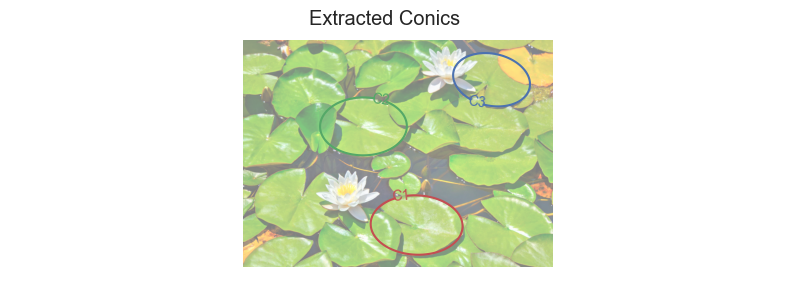

In [56]:
from HomoTopiContinuation.Plotter.Plotter import Plotter
plotter = Plotter(1, 1, title = "Extracted Conics", figsize=(10, 3))
plotter.newAxis(axisSame=False)
plotter.getCurrentAxis().imshow(img, alpha=0.5)
plotter.getCurrentAxis().axis('off')
plotter.getCurrentAxis().grid(False)
plotter.plotConic2D(C1, color='r', conicName="C1")
plotter.plotConic2D(C2, color='g', conicName="C2")
plotter.plotConic2D(C3, color='b', conicName="C3")
plotter.show()

# Rectification

  0%|          | 0/3000 [00:00<?, ?it/s]

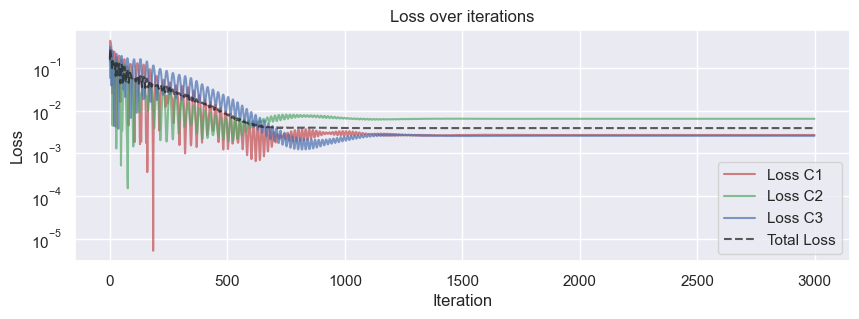

In [57]:
from HomoTopiContinuation.Rectifier.homotopyc_rectifier import HomotopyContinuationRectifier
from HomoTopiContinuation.Rectifier.numeric_rectifier import NumericRectifier
from HomoTopiContinuation.Rectifier.GDRectifier import GDRectifier
import jax.numpy as jnp

rectifier = GDRectifier
C1.M = C1.M / C1.M[2, 2]  # Normalize the conic matrix
C2.M = C2.M / C2.M[2, 2]  # Normalize the conic matrix
C3.M = C3.M / C3.M[2, 2]  # Normalize the conic matrix
H, history, losses, grads, ms, vs = rectifier.rectify(Conics(C1, C2, C3), alpha=1e-3, iterations=3000, beta1=.99, beta2=.999, weights=jnp.array([1.0, 1.0, 1.0]), early_stopping=False)

# Plot the losses
plt.figure(figsize=(10, 3))
plt.semilogy(losses[:, 0], label='Loss C1', color='r', alpha=0.7)
plt.semilogy(losses[:, 1], label='Loss C2', color='g', alpha=0.7)
plt.semilogy(losses[:, 2], label='Loss C3', color='b', alpha=0.7)
plt.semilogy(losses[:, 3], label='Total Loss', color='k', linestyle='--', alpha=0.7)
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

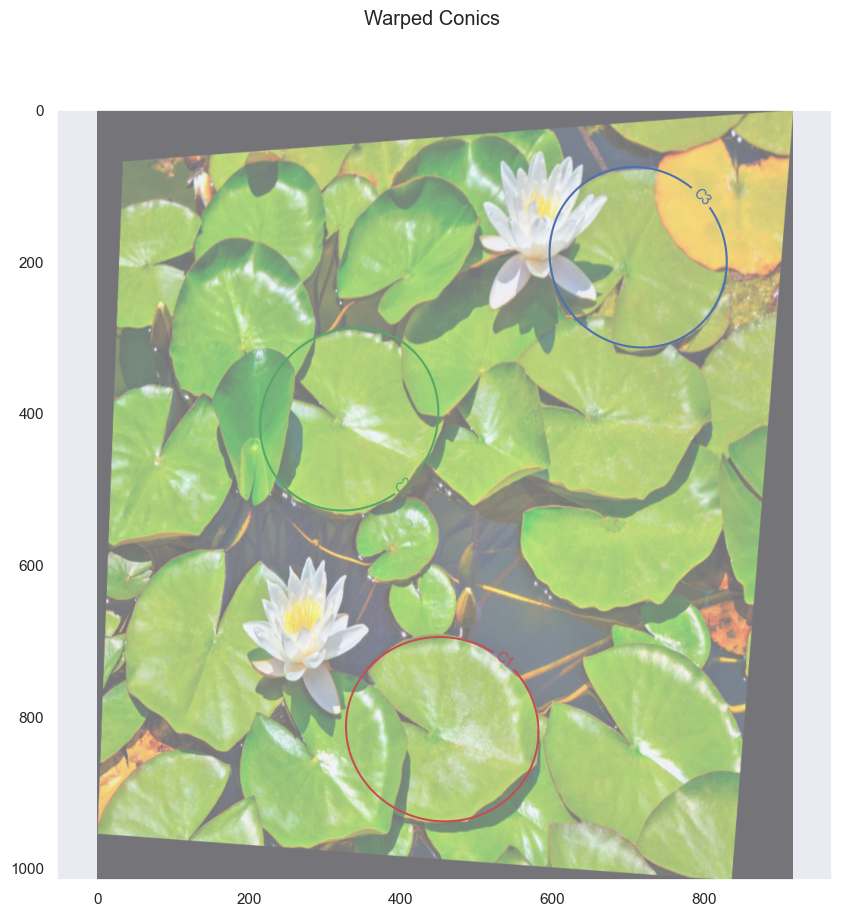

In [58]:
from HomoTopiContinuation.ImageWarper.ImageWarper import ImageWarper
warper = ImageWarper()
warped_img, adjH = ImageWarper()(img, H)
centerX_warped = warped_img.shape[1] // 2
centerY_warped = warped_img.shape[0] // 2
adjH = Homography(adjH)
# Rectify the conics using the homography
C1_warped = C1.applyHomography(adjH)
C2_warped = C2.applyHomography(adjH)
C3_warped = C3.applyHomography(adjH)

plotter = Plotter(1, 1, title = "Warped Conics", figsize=(10, 10))

plotter.newAxis(axisSame=True)
ax = plotter.getCurrentAxis()
ax.grid(False)
ax.imshow(warped_img, alpha=0.5)
plotter.plotConic2D(C1_warped, color='r', conicName="C1")
plotter.plotConic2D(C2_warped, color='g', conicName="C2")
plotter.plotConic2D(C3_warped, color='b', conicName="C3")

plotter.show()


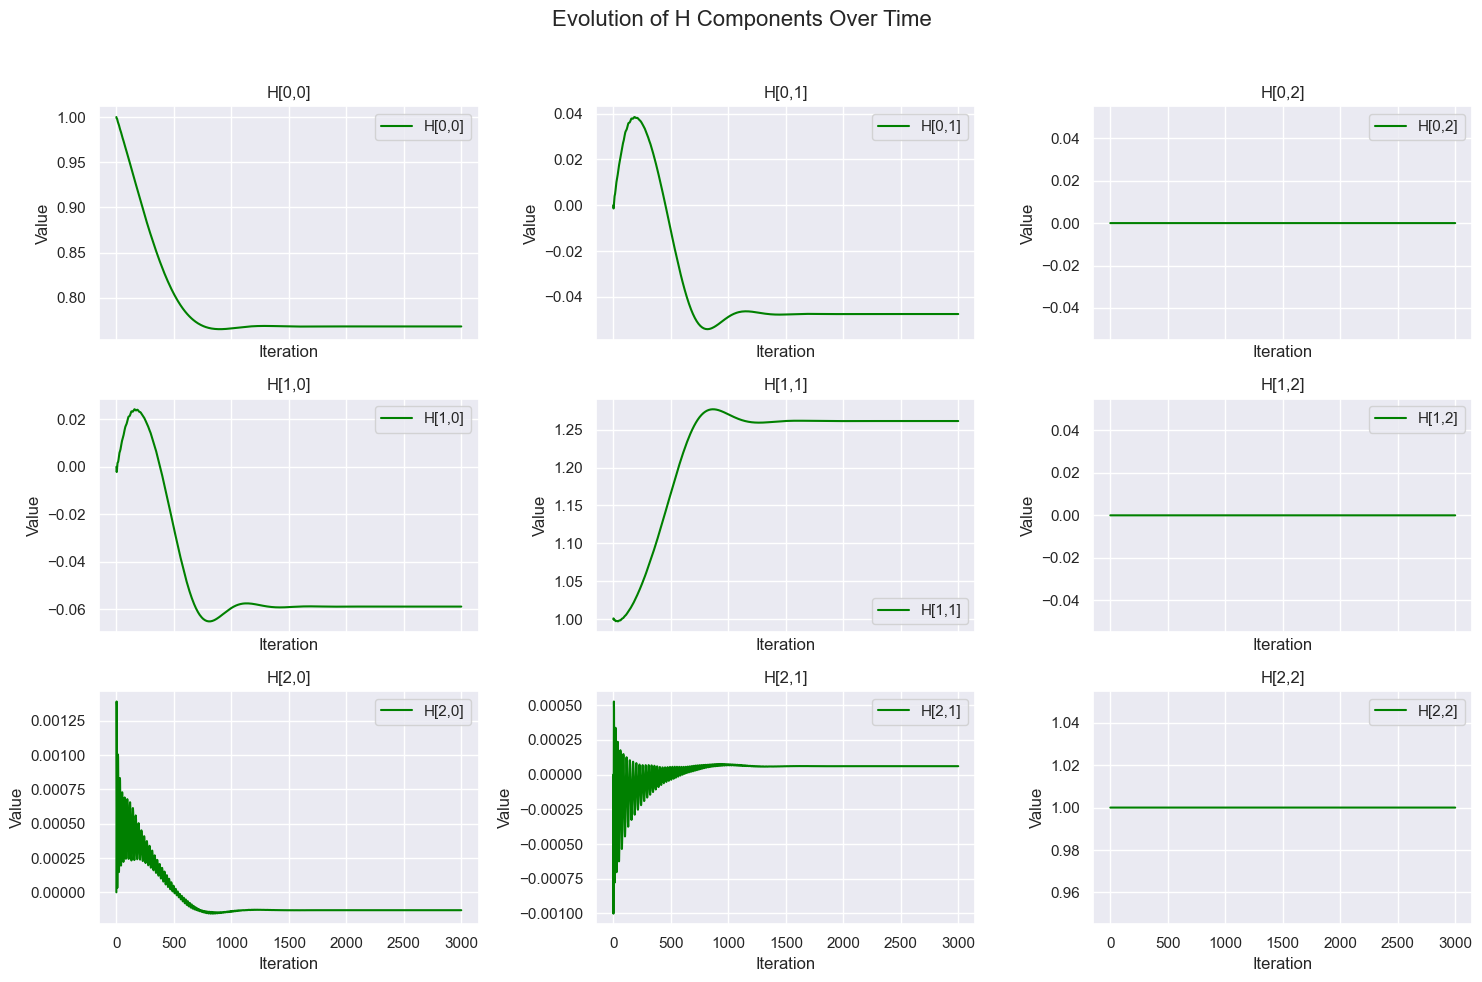

In [59]:
# Plot the evolution of each component of the 3x3 H matrix over time in a 3x3 grid

# Convert the list of Homography objects in history to a numpy array of shape (steps, 3, 3)
H_arr = np.array([h.H for h in history])  # shape: (steps, 3, 3)

fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
fig.suptitle("Evolution of H Components Over Time", fontsize=16)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        ax.plot(H_arr[:, i, j], label=f'H[{i},{j}]', color='green')
        ax.set_title(f"H[{i},{j}]")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Value")
        ax.grid(True)
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

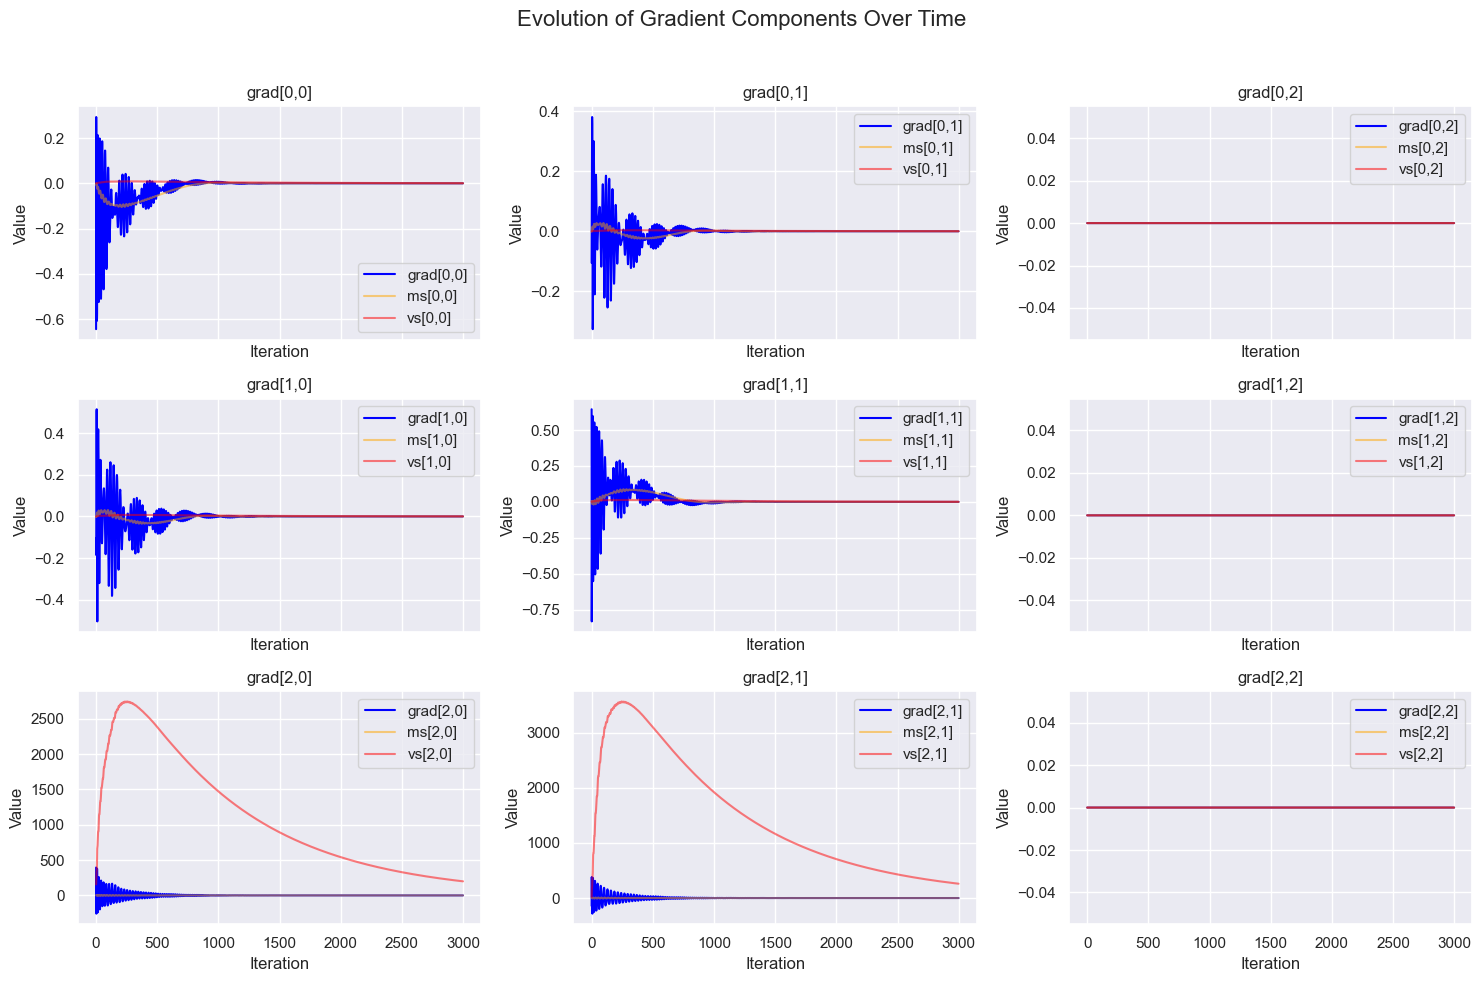

In [60]:
# Plot the evolution of each component of the 3x3 gradient matrix over time in a 3x3 grid

fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
fig.suptitle("Evolution of Gradient Components Over Time", fontsize=16)

# grads is assumed to be a list of 3x3 matrices (e.g., jax.numpy arrays or numpy arrays)
grads_arr = np.array(grads)  # shape: (steps, 3, 3)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        ax.plot(grads_arr[:, i, j], label=f'grad[{i},{j}]', color='blue')
        ax.plot(ms[:, i, j], label=f'ms[{i},{j}]', color='orange', alpha=0.5)
        ax.plot(vs[:, i, j], label=f'vs[{i},{j}]', color='red', alpha=0.5)
        ax.legend()
        ax.set_title(f"grad[{i},{j}]")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Value")
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [61]:
from HomoTopiContinuation.Losser.CircleLosser import CircleLosser

CircleLosser.computeCircleLoss(None, Conics(C1_warped, C2_warped, C3_warped))

[np.float64(0.31439149271764594),
 np.float64(0.3855832593786741),
 np.float64(0.3109144021781324)]

In [62]:
from tqdm import tqdm

import cv2

SAVEVIDEO = True  # Set to True to save the video, False to skip
if SAVEVIDEO:
    video_frames = []
    video_size = None
    startupPeriod = 0
    period = 80  # Plot every 100 steps
    firstPeriod = False

    for idx, H_step in enumerate(tqdm(history, desc="Generating frames")):
        if firstPeriod and (idx % period != 0 and idx != len(history) - 1):
            continue  # Skip frames except every 'period' and the last one

        firstPeriod = idx >= startupPeriod

        warped_img_step, adjH_step = warper(img, H_step)
        adjH_step = Homography(adjH_step)
        C1_warped_step = C1.applyHomography(adjH_step)
        C2_warped_step = C2.applyHomography(adjH_step)
        C3_warped_step = C3.applyHomography(adjH_step)

        plotter = Plotter(1, 1, title = f"Warped Conics step #{idx}", figsize=(10, 10))

        plotter.newAxis(axisSame=True)
        ax = plotter.getCurrentAxis()
        ax.grid(False)
        ax.imshow(warped_img_step, alpha=0.5)
        plotter.plotConic2D(C1_warped_step, color='r', conicName="C1")
        plotter.plotConic2D(C2_warped_step, color='g', conicName="C2")
        plotter.plotConic2D(C3_warped_step, color='b', conicName="C3")

        fig = plotter.figure
        fig.canvas.draw()

        # Convert plot to image
        frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        frame = frame[..., :3]  # Drop alpha channel to get RGB
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)

        if video_size is None:
            video_size = (frame.shape[1], frame.shape[0])
        video_frames.append(frame)

    # Save video
    out = cv2.VideoWriter(f'./GD_tests/rectificationVideos/rectification_history[{filename}].mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, video_size)
    for frame in video_frames:
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    out.release()
    print(f"Video saved as './GD_tests/rectificationVideos/rectification_history[{filename}].mp4'")

Generating frames: 100%|██████████| 3000/3000 [00:06<00:00, 428.76it/s]


Video saved as './GD_tests/rectificationVideos/rectification_history[lilyPads.webp].mp4'
